# `20180417a` -- Comparing modules vs echOmods


### NB 

* Sampling at 21Msps on both setups.
  * Full speed for the ADC pHAT
  * Full speed of the un0rick board is 64Msps..a bit more than 3x faster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Calibrating echoes

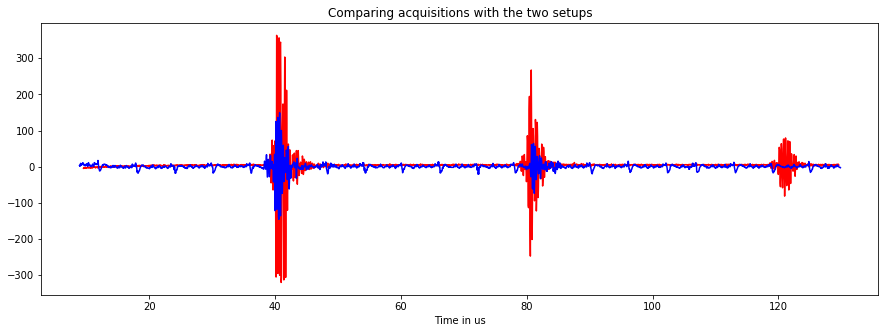

In [155]:
DATAMOD = np.load("20180415r.npz") 
DATAUNO = np.load("20180403a.npz") 
Image, rawSignal = DATAMOD['arr_1'], DATAMOD['arr_0']
rawSig,tU = DATAUNO['arr_1'], DATAUNO['arr_0']
t = [x/22.5 for x in range(10000)]
tU = [x/21.0 for x in range(10000)]
rawSig = rawSig - np.average(rawSig[200:400])
rawSignal = rawSignal - np.average(rawSignal[200:400])
#plt.plot(tU[200:],rawSig[200:])
#plt.plot(t[200:3000],rawSignal[10000:12800],"r")
#plt.show()
t_M = t[200:3000-77]
s_U = rawSig[200:]
t_U = tU[200:len(s_U)+200] 
s_M = rawSignal[10000:12800-77]

plt.figure(figsize=(15, 5))
plt.title("Comparing acquisitions with the two setups")
plt.plot(t_U,s_U,"r") # @21Msps
plt.plot(t_M,s_M,"b") # @22.5Msps
plt.xlabel("Time in us")
plt.savefig('comparing.jpg', bbox_inches='tight')
plt.show()


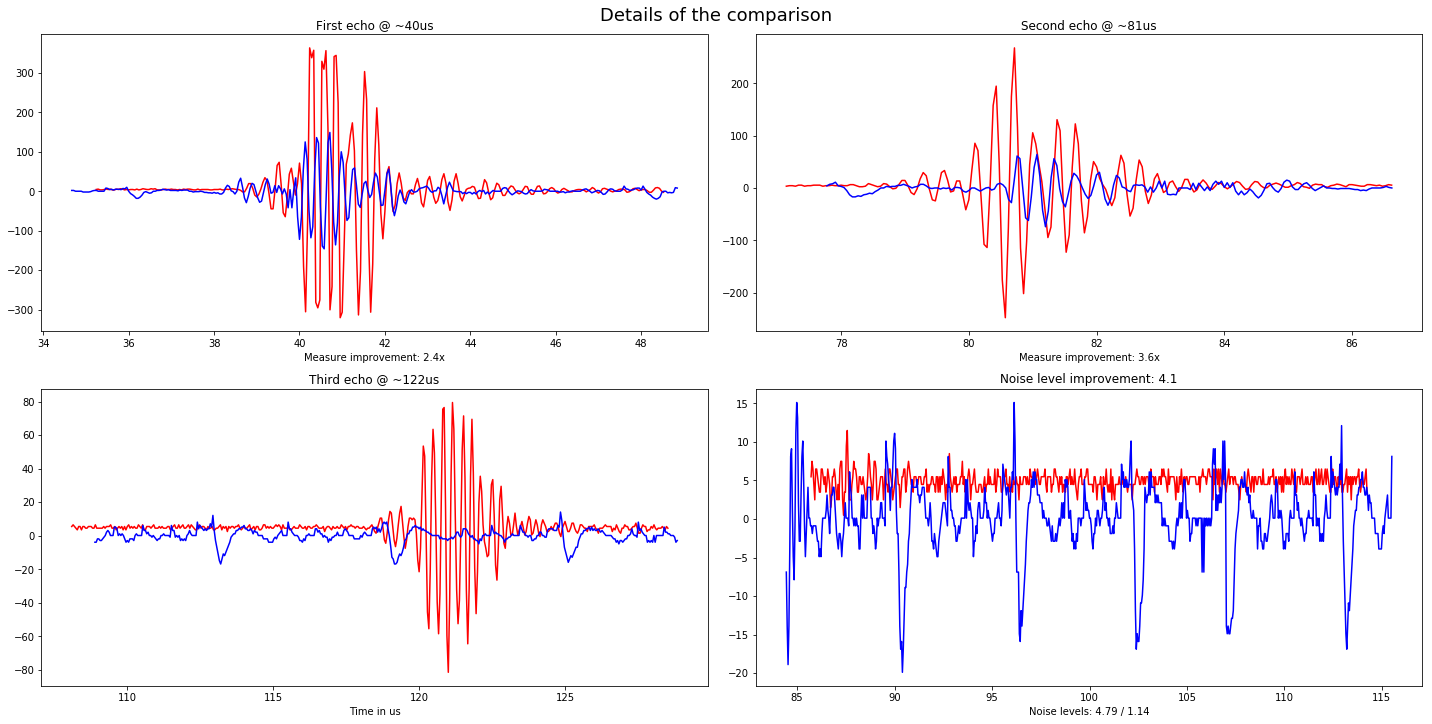

In [171]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))



ax1.plot(t_U[540:820],s_U[540:820],"r") # @22.5Msps
ax1.plot(t_M[580:900],s_M[580:900],"b") # @22.5Msps
U = np.max(np.abs(s_U[540:820]))
M = np.max(np.abs(s_M[580:900]))
ax1.set_xlabel('Measure improvement: '+str(int(10*U/M)/10.0)+"x") 
ax1.set_title('First echo @ ~40us')

ax2.plot(t_U[1420:1620],s_U[1420:1620],"r") # @22.5Msps
ax2.plot(t_M[1550:1750],s_M[1550:1750],"b") # @22.5Msps
U = np.max(np.abs(s_U[1420:1620]))
M = np.max(np.abs(s_M[1550:1750]))
ax2.set_xlabel('Measure improvement: '+str(int(10*U/M)/10.0)+"x") 
ax2.set_title('Second echo @ ~81us')
#ax2.set_xlabel('Time in us')

ax3.plot(t_U[2070:2500],s_U[2070:2500],"r") # @22.5Msps
ax3.plot(t_M[2250:2700],s_M[2250:2700],"b") # @22.5Msps
ax3.set_title('Third echo @ ~122us')
ax3.set_xlabel('Time in us')

ax4.plot(t_U[1600:2200],s_U[1600:2200],"r") # @22.5Msps
ax4.plot(t_M[1700:2400],s_M[1700:2400],"b") # @22.5Msps
stdU = np.std(s_U[1600:2200])
stdM = np.std(s_M[1700:2400])
ax4.set_title('Noise level improvement: '+str(int(10*stdM/stdU)/10.0)) 
ax4.set_xlabel('Noise levels: '+str(int(stdM*100)/100.0) + ' / '+str(int(stdU*100)/100.0))
plt.suptitle('Details of the comparison', fontsize=18, y = 1.001)
plt.tight_layout()

plt.savefig('details.jpg', bbox_inches='tight')


plt.show()